## Importing Dependencies

In [6]:
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [12]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 466.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 234.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 297.7 kB/s eta 0:00:0000:0100:04
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.1 requires pyqtwebengine<5.16, which is not installed.


## Load Model

In [4]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in /Users/siddhant/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-2 Python-3.10.9 torch-2.0.0 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detections 

In [13]:
img=("https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/16:9/w_1280,c_limit/highway-traffic.jpg")
result=model(img)
print(result)

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 867.1ms pre-process, 218.6ms inference, 20.1ms NMS per image at shape (1, 3, 480, 640)


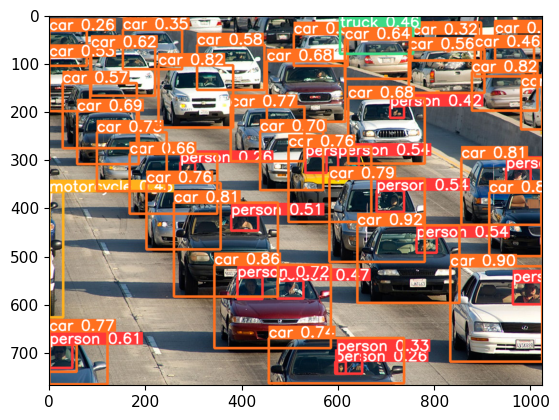

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

## Training from Scratch

In [3]:
import uuid
import os
import time

In [6]:
IMAGES_PATH = os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20

In [9]:
cap=cv2.VideoCapture(1)
#loop through labels
for label in labels:
    print("Collecting images for {}".format(labels))
    time.sleep(5)
    
    #loop through images
    for img_num in range(number_imgs):
        print("Collecting images for {}, image number {}".format(label,img_num))
        
        #webcam/video
        ret,frame=cap.read()
        
        #naming the images
        imgname=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        
        #writing out image to files
        cv2.imwrite(imgname,frame)
        
        #render to screen
        cv2.imshow('Image Collection',frame)
        
        #to take a pause for 2 secs between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
    

In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epoch 50 --data dataset.yml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-5-1 Python-3.10.9 torch-2.0.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

       6/49         0G    0.06331    0.01565    0.02965         14        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        200        160      0.141       0.72      0.208     0.0656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       7/49         0G    0.06399    0.01657    0.02862         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        200        160     0.0984      0.777       0.15     0.0348

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       8/49         0G    0.06183    0.01475    0.02663         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        200        160      0.314      0.729      0.372      0.126

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/4

      31/49         0G    0.02937   0.008893    0.01055         14        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        200        160      0.975      0.983      0.987      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      32/49         0G    0.03036   0.009164    0.01162         10        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        200        160      0.977      0.981      0.987      0.692

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      33/49         0G    0.03057   0.008992    0.01012         12        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        200        160      0.975      0.995      0.986      0.685

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      34/4

COMET INFO: Still saving offline stats to messages file before program termination (may take up to 120 seconds)
COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /Users/siddhant/Documents/UPES/6th Sem/Project/yolov5/.cometml-runs/f0010c6495ce4d5c8abf87d692eff7c8.zip


## Load Model

In [9]:
model=torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp10/weights/last.pt')

Using cache found in /Users/siddhant/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-2 Python-3.10.9 torch-2.0.0 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img=os.path.join('data','images','gettyimages-1257324726-612x612.jpg')
result=model(img)
print(result)

image 1/1: 408x612 1 awake
Speed: 26.0ms pre-process, 276.9ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


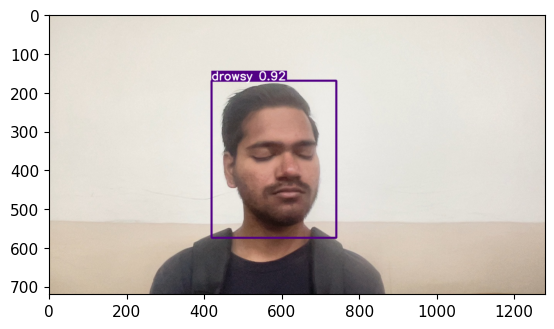

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [12]:
cap=cv2.VideoCapture(1)

while cap.isOpened():
    
    ret,frame=cap.read()
    
    result=model(frame)
    
    cv2.imshow('YOLO',np.squeeze(result.render()))
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()